In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [2]:
data_path = "/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv"

data = pd.read_csv(data_path)

data.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
rows_with_na = data[data.isna().any(axis=1)]
rows_with_na.head()

,N,P,K,temperature,humidity,ph,rainfall,label


In [5]:
x = data.drop('label', axis = 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])


x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [6]:
np.unique(y,return_counts= True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100]))

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=2)

In [8]:
Xtrain.head()

,N,P,K,temperature,humidity,ph,rainfall
1936,113,38,25,22.000851,79.472710,7.388266,90.422242
610,28,35,22,29.530376,86.733460,7.156563,59.872321
372,11,61,21,18.623288,23.024103,5.532101,135.337803
1559,29,139,205,23.641424,93.744615,6.155939,116.691218
1500,24,128,196,22.750888,90.694892,5.521467,110.431786


In [9]:
import xgboost
print(xgboost.__version__)

2.0.3


In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(Xtrain,Ytrain)

predictions = model.predict(Xtest)


acc_score = metrics.accuracy_score(Ytest, predictions)
print("Accuracy ", acc_score)

print(classification_report(Ytest,predictions))

Accuracy  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29

In [11]:
label_encoder.inverse_transform(predictions)[0]

'coffee'

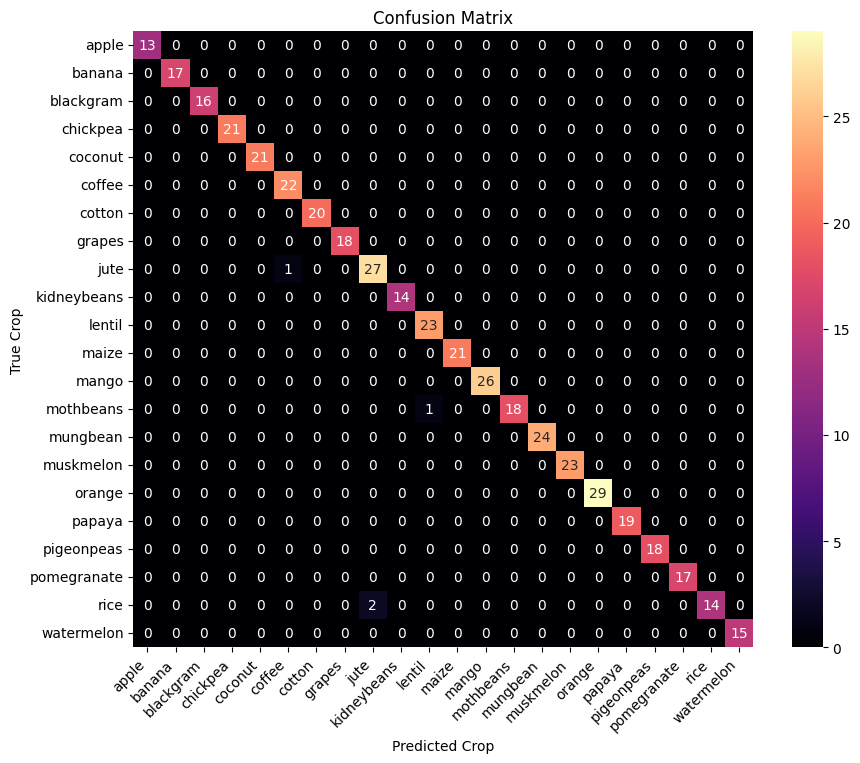

In [12]:
cm = confusion_matrix(Ytest, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Crop")
plt.ylabel("True Crop")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [13]:
custom_data = ((x.iloc[0]).to_numpy()).reshape(1,-1)
custom_data

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ]])

In [14]:
probabilities = model.predict_proba(custom_data)
probabilities

array([[4.3094926e-05, 7.8955731e-05, 2.5446649e-05, 4.6838290e-05,
        5.1855695e-05, 1.0772679e-04, 3.6975856e-05, 4.3841545e-05,
        9.1761875e-04, 4.7414593e-05, 1.6991715e-05, 5.6466844e-05,
        3.4588666e-05, 1.3286843e-05, 3.6634512e-05, 5.3610715e-05,
        4.5607081e-05, 3.5075744e-05, 1.9437895e-05, 4.9160313e-05,
        9.9818736e-01, 5.1989788e-05]], dtype=float32)

In [15]:
sample_probabilities = probabilities[0]

sorted_indices = np.argsort(sample_probabilities)[::-1]
sorted_probabilities = sample_probabilities[sorted_indices]
sorted_classes = label_encoder.inverse_transform(sorted_indices)

for label, prob in zip(sorted_classes, sorted_probabilities):
    print(f"Class: {label}, Probability: {prob:.4f}")

Class: rice, Probability: 0.9982
Class: jute, Probability: 0.0009
Class: coffee, Probability: 0.0001
Class: banana, Probability: 0.0001
Class: maize, Probability: 0.0001
Class: muskmelon, Probability: 0.0001
Class: watermelon, Probability: 0.0001
Class: coconut, Probability: 0.0001
Class: pomegranate, Probability: 0.0000
Class: kidneybeans, Probability: 0.0000
Class: chickpea, Probability: 0.0000
Class: orange, Probability: 0.0000
Class: grapes, Probability: 0.0000
Class: apple, Probability: 0.0000
Class: cotton, Probability: 0.0000
Class: mungbean, Probability: 0.0000
Class: papaya, Probability: 0.0000
Class: mango, Probability: 0.0000
Class: blackgram, Probability: 0.0000
Class: pigeonpeas, Probability: 0.0000
Class: lentil, Probability: 0.0000
Class: mothbeans, Probability: 0.0000


In [16]:
label_encoder.inverse_transform(y)[0]

'rice'

In [18]:
import pickle
with open('ropai_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('ropai_label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)